In [3]:
import json
import random
import numpy as np
import pandas as pd
from tqdm import tqdm, trange
from datasets import load_from_disk, load_dataset

import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## passage shuffle

문장 셔플로 인해 기존 결과대비 em,f1 각 2점씩 상승함

In [6]:
train_datasets = load_from_disk('../../sentence_shuffle/train_dataset')
train_datasets

DatasetDict({
    train: Dataset({
        features: ['id', 'question', 'context', 'answers'],
        num_rows: 3952
    })
    validation: Dataset({
        features: ['id', 'question', 'context', 'answers'],
        num_rows: 240
    })
})

In [7]:
train_datasets['train'][0]

{'id': 'mrc-1-000067',
 'question': '대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?',
 'context': '그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. \\n\\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. \\n\\n미국 부통령이 상원의장이 된다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 날짜=2017-02-05 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.',
 'answers': {'answer_start': [486], 'text':

In [8]:
train_contexts = train_datasets['train']['context']

In [9]:
print(len(train_contexts))

3952


In [10]:
train_len = []
for doc in train_contexts:
    train_len.append(len(doc))

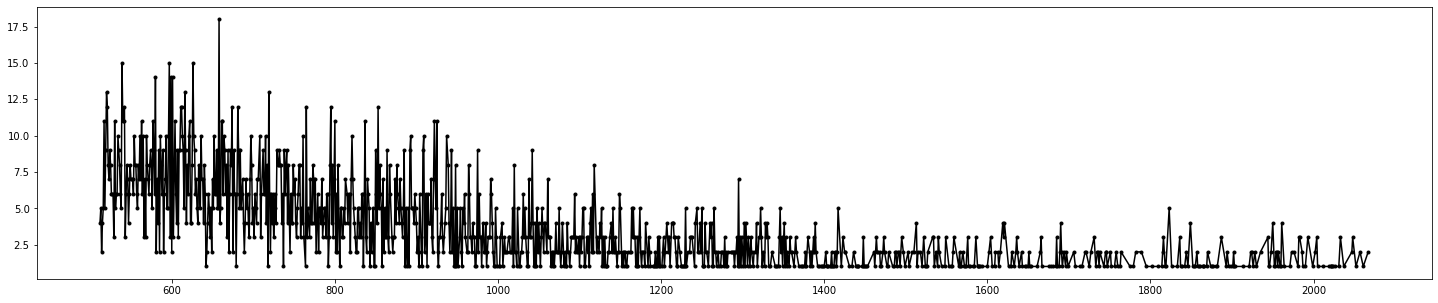

In [11]:
from collections import Counter

count_len = Counter(train_len)
count_len = sorted(count_len.items())
x = [x[0] for x in count_len]
y = [x[1] for x in count_len]

fig, ax = plt.subplots(1, 1, figsize=(25, 5))
ax.plot(x, y,
        color='black',
        marker='.',
        linestyle='solid', 
       )

plt.show()

In [15]:
train_answers = datasets['train']['answers']
print(train_answers[0])
print(train_answers[1])

{'answer_start': [486], 'text': ['하원']}
{'answer_start': [20], 'text': ['《경영의 실제》']}


In [16]:
train_answers_idx = []
train_answers_text = []
for i in train_answers:
    train_answers_idx.append(i['answer_start'][0])
    train_answers_text.append(i['text'][0])

In [19]:
train_answer_idx_percent = []
for i in range(len(train_answers)):
    train_answer_idx_percent.append(train_answers_idx[i]/train_len[i])
train_answer_idx_percent[:10]

[0.561849710982659,
 0.03215434083601286,
 0.6321974148061105,
 0.691358024691358,
 0.049019607843137254,
 0.7949852507374632,
 0.6472868217054264,
 0.9583333333333334,
 0.2732166890982503,
 0.3049645390070922]

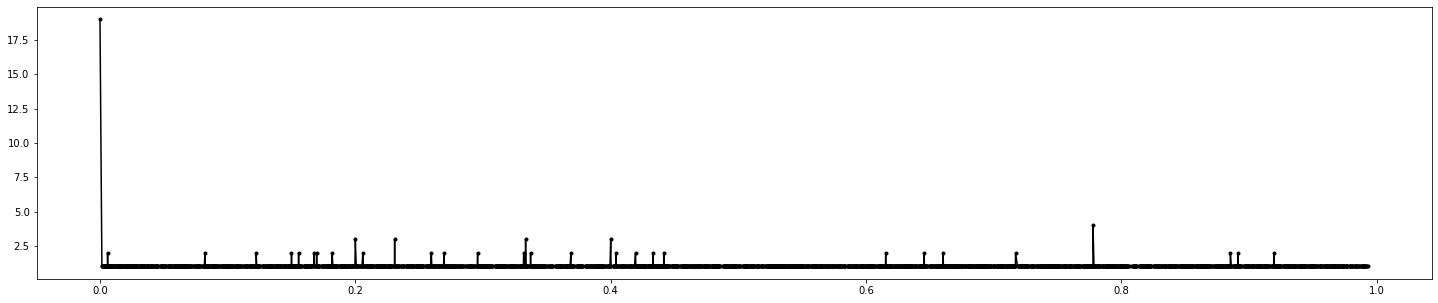

In [20]:
count_len = Counter(train_answer_idx_percent)
count_len = sorted(count_len.items())
x = [x[0] for x in count_len]
y = [x[1] for x in count_len]

fig, ax = plt.subplots(1, 1, figsize=(25, 5))
ax.plot(x, y,
        color='black',
        marker='.',
        linestyle='solid', 
       )

plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

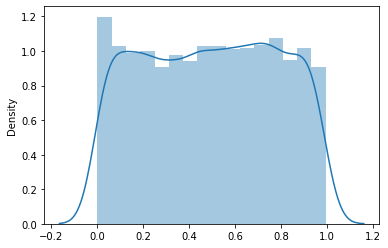

In [21]:
sns.distplot(train_answer_idx_percent)

이전 기본 dataset의 분포와 비교해보았을 때, 정답분포 위치가 상대적으로 균일해졌음을 파악할 수 있음.